In [1]:
%run '0.0_init_configuration.ipynb'

**Petición de la API Fear & Greed en el mercado de criptomonedas**

In [2]:
url = 'https://api.alternative.me/fng/?limit=0'

In [3]:
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    data = pd.DataFrame(data['data'])

    data.value = data.value.astype(int)
    data['timestamp'] = pd.to_datetime(pd.to_numeric(data['timestamp']), unit='s')
    data.set_index('timestamp', inplace=True)
else: 
    print(f'Error al realizar la solicitud. Código de estado: {response.status_code}')

In [4]:
data

,value,value_classification,time_until_update
timestamp,,,
2024-12-12,83,Extreme Greed,7182
2024-12-11,74,Greed,NaN
2024-12-10,78,Extreme Greed,NaN
2024-12-09,78,Extreme Greed,NaN
2024-12-08,79,Extreme Greed,NaN
...,...,...,...
2018-02-05,11,Extreme Fear,NaN
2018-02-04,24,Extreme Fear,NaN
2018-02-03,40,Fear,NaN


**Datos del Activo BTC-USD**

In [5]:
df = yf.Ticker('BTC-USD')
df = df.history(period='max')
df.index.name = 'timestamp' 
df.index = df.index.tz_localize(None)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
timestamp,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-08,99921.914062,101399.992188,98771.515625,101236.015625,44125751925,0.0,0.0
2024-12-09,101237.062500,101272.507812,94355.914062,97432.718750,110676473908,0.0,0.0
2024-12-10,97441.234375,98270.156250,94321.257812,96675.429688,104823780634,0.0,0.0


In [6]:
df = pd.merge(df['Close'], data, on='timestamp', how='inner')
df

,Close,value,value_classification,time_until_update
timestamp,,,,
2018-02-01,9170.540039,30,Fear,NaN
2018-02-02,8830.750000,15,Extreme Fear,NaN
2018-02-03,9174.910156,40,Fear,NaN
2018-02-04,8277.009766,24,Extreme Fear,NaN
2018-02-05,6955.270020,11,Extreme Fear,NaN
...,...,...,...,...
2024-12-08,101236.015625,79,Extreme Greed,NaN
2024-12-09,97432.718750,78,Extreme Greed,NaN
2024-12-10,96675.429688,78,Extreme Greed,NaN


In [7]:
# Definimos los colores y las condiciones 
df['color'] = df['value'].apply(lambda value: '#fa2c00' if value <= 20 else # Extreme fear
                                            '#FF9900' if value <= 40 else # fear
                                            '#FFFF00' if value <= 60 else # Neutral
                                            '#00FF33' if value <= 80 else # Greed
                                            '#00FFFF' ) # Extrme greed

In [8]:
len(df)

2503

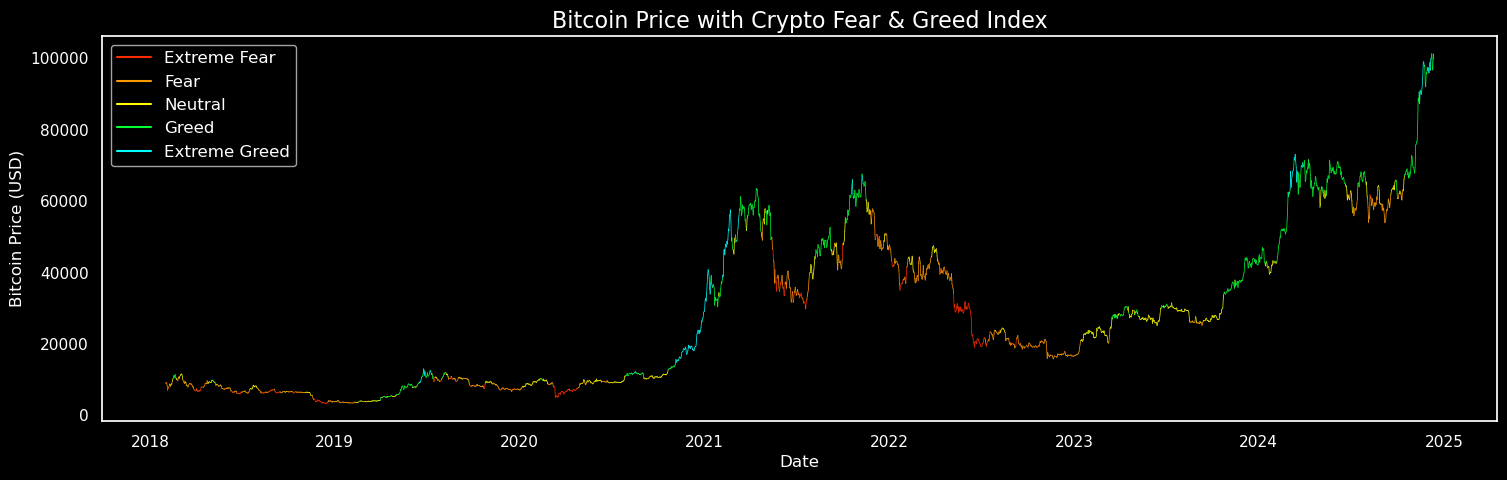

In [9]:
# Plot
for i in range(len(df) - 1):
    plt.plot(df.index[i:i + 2], # Toma dos indices para poder graficar y pintar
             df['Close'][i:i + 2],
             color=df['color'].iloc[i],
             linewidth=0.5)
    
plt.title('Bitcoin Price with Crypto Fear & Greed Index', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Bitcoin Price (USD)', fontsize=12)
# Agregar líneas "falsas" para la leyenda
plt.plot([], [], color='#fa2c00', label='Extreme Fear')    # Línea invisible
plt.plot([], [], color='#FF9900', label='Fear')         # Línea invisible
plt.plot([], [], color='#FFFF00', label='Neutral')      # Línea invisible
plt.plot([], [], color='#00FF33', label='Greed')         # Línea invisible
plt.plot([], [], color='#00FFFF', label='Extreme Greed')  # Línea invisible

plt.legend(loc='upper left', fontsize=12)
plt.show()

In [10]:
# def map_color(value):
#     if value <= 20:
#         return 'red' # Extreme fear
#     elif value <= 40:
#         return 'orange' # Fear
#     elif value <= 60:
#         return 'yellow' # Neutral
#     elif value <= 80:
#         return 'green' # Greed
#     else:
#         return 'blue' # Extreme greed
    
# df['color'] = df['value'].apply(map_color)